In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.fillna(df.total_bedrooms.median(),inplace=True)

In [5]:
def get_dist():
    _,ax = plt.subplots(ncols=2,nrows=5,figsize=(8,10))
    
    idx = np.asarray(range(10)).reshape((5,2))
    columns = df.columns
    for i,r in enumerate(idx):
        for j,c in enumerate(r):
            sb.histplot(x=df[columns[c]],ax=ax[i,j])
    plt.tight_layout()
    plt.show()
            
            



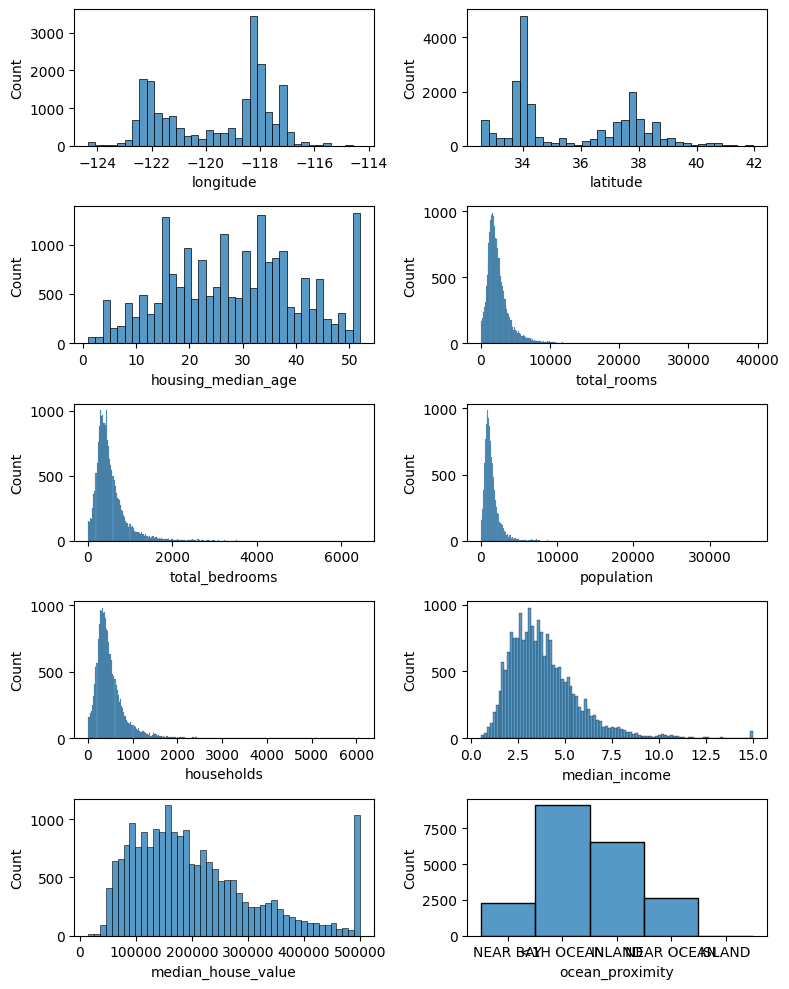

In [6]:
get_dist()

In [7]:
left_skewwed = ['total_rooms','total_bedrooms','population','households','median_income']

In [8]:
for col in left_skewwed:
    df[col] = np.log(df[col])

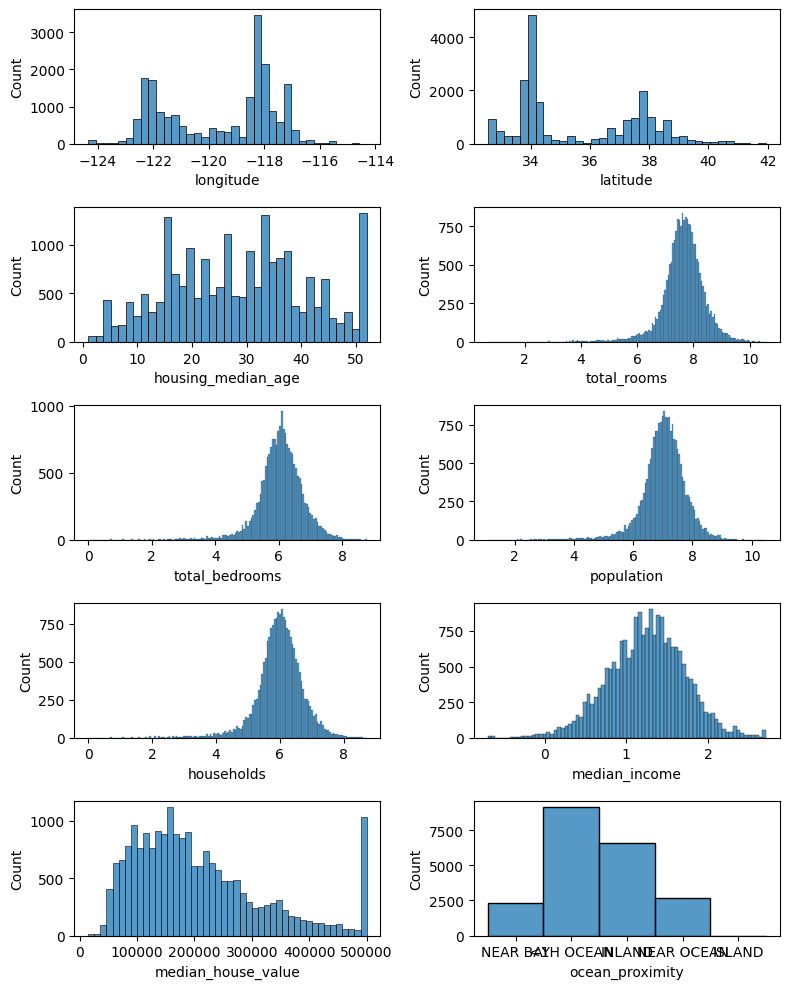

In [9]:
get_dist()

<Axes: xlabel='median_house_value'>

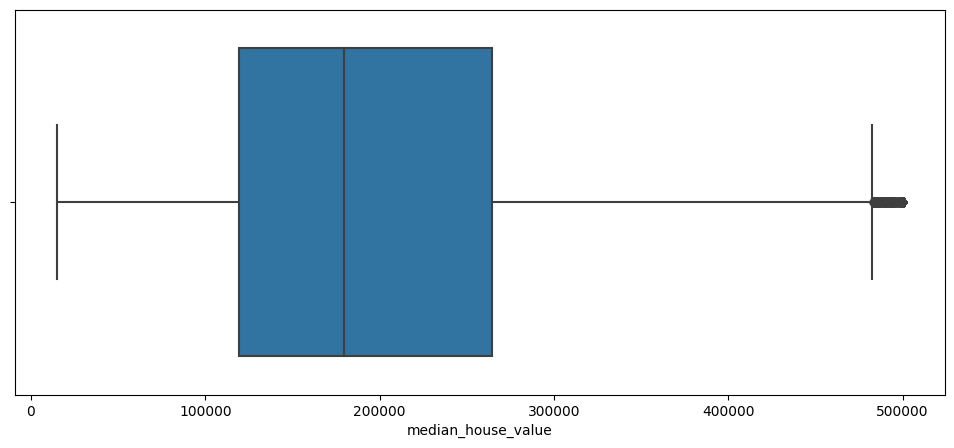

In [10]:
plt.figure(figsize=(12,5))
sb.boxplot(x=df.median_house_value)

<Axes: >

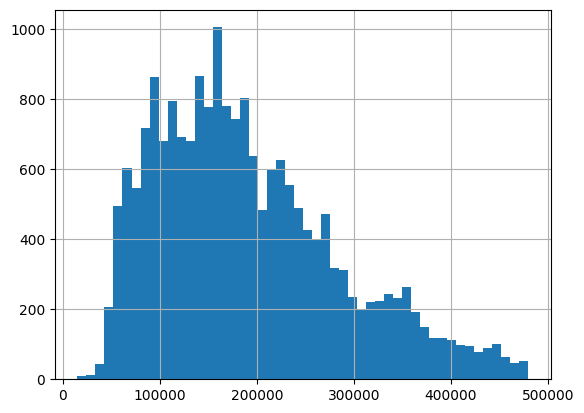

In [11]:
df.median_house_value[df.median_house_value <= 480000].hist(bins=50)

In [12]:
len(df.median_house_value[df.median_house_value <= 480000])/len(df)

0.9477228682170543

In [13]:
df = df[df.median_house_value <= 480000]

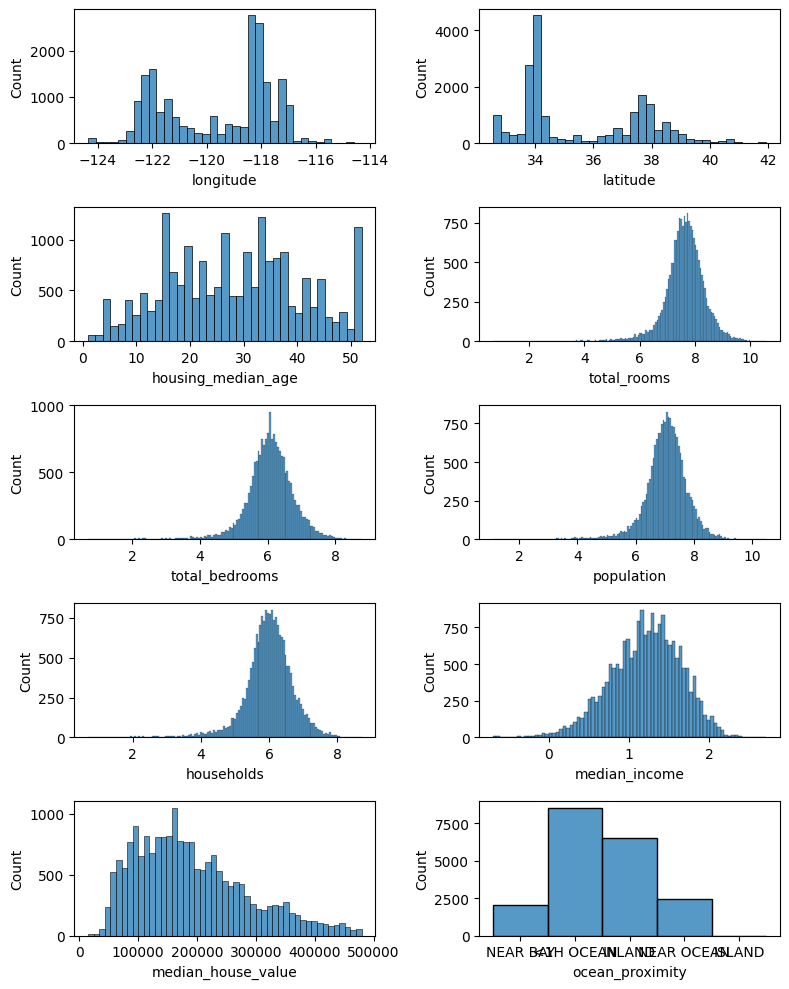

In [14]:
get_dist()

In [15]:
encoding = df[['ocean_proximity','median_house_value']].groupby(by='ocean_proximity').mean().median_house_value
encoding_map = dict(encoding)
encoding_map

{'<1H OCEAN': 222231.25073125074,
 'INLAND': 122972.83264304341,
 'ISLAND': 380440.0,
 'NEAR BAY': 234202.6036644166,
 'NEAR OCEAN': 224433.4023178808}

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

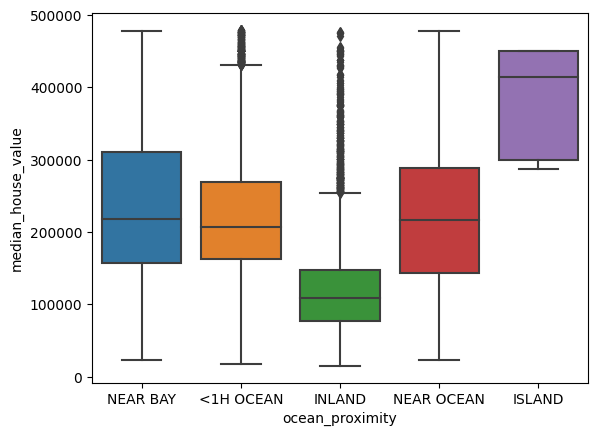

In [16]:
sb.boxplot(y=df.median_house_value,x=df.ocean_proximity)

In [17]:
df.ocean_proximity.value_counts()

<1H OCEAN     8547
INLAND        6519
NEAR OCEAN    2416
NEAR BAY      2074
ISLAND           5
Name: ocean_proximity, dtype: int64

In [18]:
df.loc[0].values

array([-122.23, 37.88, 41.0, 6.779921907472252, 4.859812404361672,
       5.7745515455444085, 4.836281906951478, 2.1192870596019593,
       452600.0, 'NEAR BAY'], dtype=object)

In [19]:
island_idx = df[df.ocean_proximity == 'ISLAND'].index

In [20]:
df.drop(island_idx,inplace=True)

In [21]:
df.ocean_proximity.value_counts()

<1H OCEAN     8547
INLAND        6519
NEAR OCEAN    2416
NEAR BAY      2074
Name: ocean_proximity, dtype: int64

In [22]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,2.119287,452600.0,NEAR BAY
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,2.116424,358500.0,NEAR BAY
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,1.982022,352100.0,NEAR BAY
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,1.730434,341300.0,NEAR BAY
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,1.347086,342200.0,NEAR BAY


In [23]:
df = pd.get_dummies(data=df,columns=['ocean_proximity'],drop_first=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19556 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19556 non-null  float64
 1   latitude                    19556 non-null  float64
 2   housing_median_age          19556 non-null  float64
 3   total_rooms                 19556 non-null  float64
 4   total_bedrooms              19556 non-null  float64
 5   population                  19556 non-null  float64
 6   households                  19556 non-null  float64
 7   median_income               19556 non-null  float64
 8   median_house_value          19556 non-null  float64
 9   ocean_proximity_INLAND      19556 non-null  uint8  
 10  ocean_proximity_NEAR BAY    19556 non-null  uint8  
 11  ocean_proximity_NEAR OCEAN  19556 non-null  uint8  
dtypes: float64(9), uint8(3)
memory usage: 1.5 MB


<Axes: >

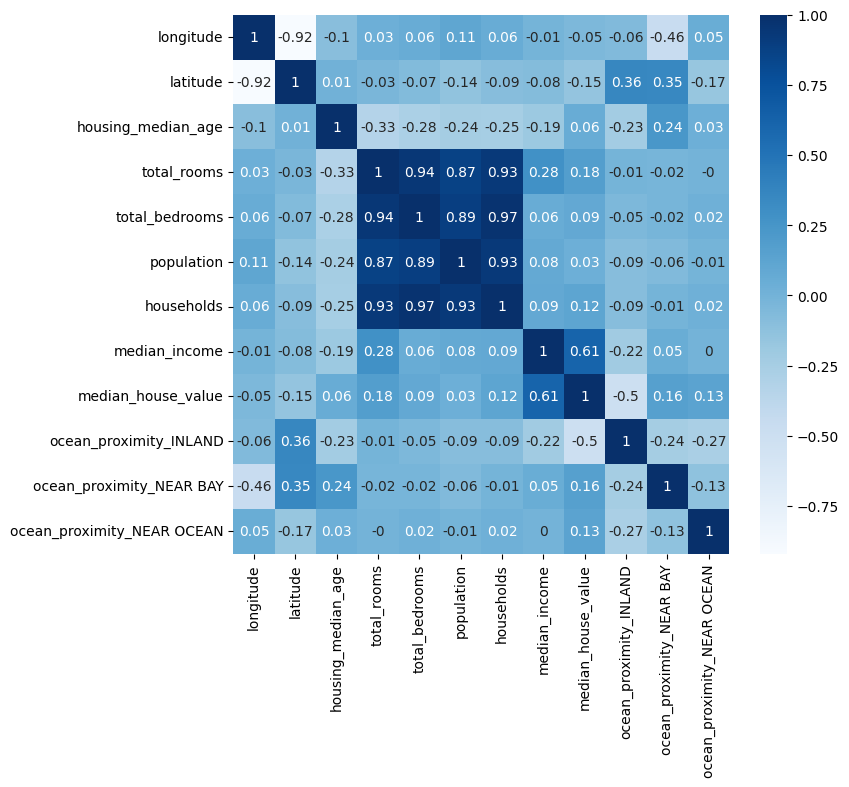

In [25]:
plt.figure(figsize=(8,7))
sb.heatmap(np.round(df.corr(),2),annot=True,cmap='Blues')

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.svm import SVR

In [27]:
scaler = RobustScaler()

lr = LinearRegression()
rid = Ridge()
svr = SVR()

x = df.drop('median_house_value',axis=1).values
y = df.median_house_value.values

xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=0)

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)



In [28]:
# Linear Regression

def test_model(data,model):
    xtrain,xtest,ytrain,ytest = data
    model.fit(xtrain,np.log(ytrain))
    pred = model.predict(xtest)
    pred = np.exp(pred)
    print('loss :',mean_absolute_error(ytest,pred))
    plt.plot(ytest,ytest,'r')
    plt.scatter(ytest,pred)
    plt.show()

loss : 41451.882886100444


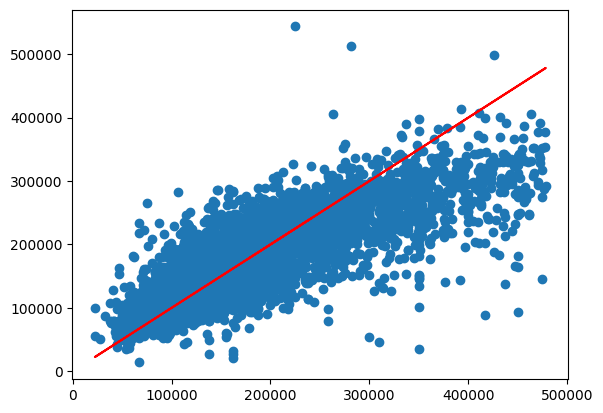

In [29]:
test_model((xtrain,xtest,ytrain,ytest),lr)

loss : 41458.042061036605


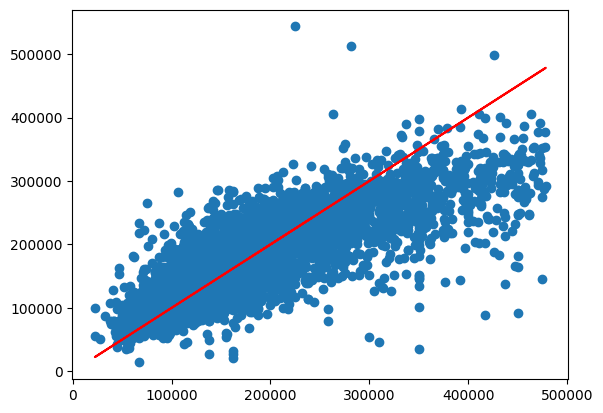

In [30]:
test_model((xtrain,xtest,ytrain,ytest),rid)

loss : 33417.2676671019


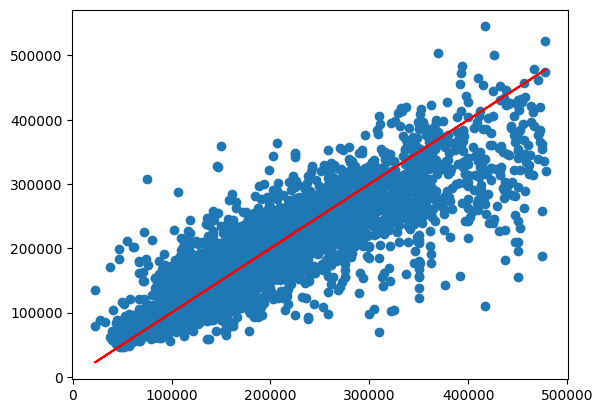

In [31]:
test_model((xtrain,xtest,ytrain,ytest),svr)